Weather - Working with APIs

Objective: Create a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator.

-Observed Trend 1: When we look at the scatter plot it shows us that the temperature increases as the latitude increases overtime  and then temperature decreases as we move farther along the latitude. The shape and direction of this graph possibly points towards a NON-LINEAR RELATIONSHIP (Reference: Temperature (F) vs. Latitude). 

-Observed Trend 2: When we look at this plot, it doesn't show any significant pattern that shows that there is a relationship, the scatter plots in this plot tells us that there is NO RELATIONSHIP . (Reference: Cloudiness (%) vs. Latitude).

-Observed Trend 3: The wind speeds is higher in regards to the average as we move farther from the equator, see (Scatter Plot: 'Wind Speed (mph)' vs. Latitude).


In [1]:
import pandas as pd
import numpy as np
import requests as req 
import json
import seaborn as sns
import matplotlib.pyplot as plt
from citipy import citipy
from config import API_KEY
import time 
import random
%matplotlib inline

In [2]:
#Generating random list for latitudes and longitudes
latitude = []
longitude = []

for lat in np.random.randint(-90,90,1000):
    latitude.append(lat)

for long in np.random.randint(-180,180,800):
    longitude.append(long)

In [3]:
latlong = tuple(zip(latitude,longitude))

In [4]:
#Locating nearest city
cities = []
country = []

for lat,long in latlong:
    city = citipy.nearest_city(lat,long)
    cityname = city.city_name
    cities.append(cityname)
    country.append(city.country_code)

In [5]:
#Different cities generated
print(len(set(cities)))

392


In [6]:
#Store all the cities & countries generated with citipy
df_countries = pd.DataFrame({'Cities': cities,
              'Country': country})

#Storing additional column to information from openweathermap api
df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''
df_countries.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,mar del plata,ar,,,,,,
1,bluff,nz,,,,,,
2,biak,id,,,,,,
3,myanaung,mm,,,,,,
4,pangnirtung,ca,,,,,,


In [7]:
#Fill in values for blank columns in dataframe and looping through all rows

for index,row in df_countries.iterrows():
    city_name = row['Cities']
    Country_id = row['Country']
    
    #url = "http://api.openweathermap.org/data/2.5/forecast/daily?id=524901&lang=zh_cn"
    
    #api call for all Cities 
    url = "http://api.openweathermap.org/data/2.5/forecast" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,Country_id,API_KEY)
    
    country_info = req.get(url).json()
    
    #print all api url's for each city
    print(url)
    
    
    try:
        df_countries.set_value(index,'Latitude',country_info['city']['coord']['lat'])
        df_countries.set_value(index,'Longitude',country_info['city']['coord']['lon'])
        df_countries.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])
        df_countries.set_value(index,'Humidity (%)',country_info['list'][0]['main']['humidity'])
        df_countries.set_value(index,'Cloudiness (%)',country_info['list'][0]['clouds']['all'])
        df_countries.set_value(index,'Wind Speed (mph)',country_info['list'][0]['wind']['speed'])
        
    except KeyError:
        df_countries.set_value(index,'Latitude',np.nan)
        df_countries.set_value(index,'Longitude',np.nan)
        df_countries.set_value(index,'Temperature (F)',np.nan)
        df_countries.set_value(index,'Humidity (%)',np.nan)
        df_countries.set_value(index,'Cloudiness (%)',np.nan)
        df_countries.set_value(index,'Wind Speed (mph)',np.nan)
        
        print('Missing weather information...skip')

http://api.openweathermap.org/data/2.5/forecast?q=mar del plata,ar&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2


C:\Users\Owner\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Owner\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Owner\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Owner\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Owner\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: set_value is deprecated and will be removed in a future

http://api.openweathermap.org/data/2.5/forecast?q=bluff,nz&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=biak,id&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=myanaung,mm&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=pangnirtung,ca&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=vaini,to&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=bethel,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=yumen,cn&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=upernavik,gl&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
htt

C:\Users\Owner\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Owner\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Owner\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Owner\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Owner\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel\__main__.py:31: FutureWarning: set_value is deprecated and will be removed in a future

http://api.openweathermap.org/data/2.5/forecast?q=sao filipe,cv&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=poum,nc&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=havelock,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=new norfolk,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=cabo san lucas,mx&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=clyde river,ca&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=ushuaia,ar&units=IMPERIAL&mode=json&APPID=94e61178e945

http://api.openweathermap.org/data/2.5/forecast?q=dikson,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=mandera,ke&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=victoria,sc&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=saldanha,za&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=taolanaro,mg&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=puri,in&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=kagadi,ug&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID

http://api.openweathermap.org/data/2.5/forecast?q=padang,id&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=hilo,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=monrovia,lr&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=cape town,za&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=wairoa,nz&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=tecoanapa,mx&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=mys shmidta,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554

http://api.openweathermap.org/data/2.5/forecast?q=port alfred,za&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=fatezh,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=codrington,ag&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=butaritari,ki&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=ribeira grande,pt&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=coihueco,cl&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=port alfred,za&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=ushuaia,ar&units=IM

http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=lebu,cl&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=illoqqortoormiut,gl&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=mataura,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=yeppoon,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=new norfolk,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecas

http://api.openweathermap.org/data/2.5/forecast?q=jamestown,sh&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=sitka,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=hasaki,jp&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=biloela,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=san ramon,bo&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=new norfolk,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=pisco,pe&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb

http://api.openweathermap.org/data/2.5/forecast?q=mehamn,no&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=kavieng,pg&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=illoqqortoormiut,gl&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=ushuaia,ar&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=bredasdorp,za&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=ushuaia,ar&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=jamestown,sh&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=amderma,ru&units=IMPERIAL&m

http://api.openweathermap.org/data/2.5/forecast?q=port blair,in&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=dunedin,nz&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=cape town,za&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=salalah,om&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=kodiak,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=dikson,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb

http://api.openweathermap.org/data/2.5/forecast?q=kodiak,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=chitral,pk&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=albany,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=lorengau,pg&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=san quintin,mx&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=grindavik,is&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=airai,pw&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=he

http://api.openweathermap.org/data/2.5/forecast?q=bluff,nz&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=erenhot,cn&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=formoso do araguaia,br&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=mys shmidta,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=lagoa,pt&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=albany,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=lima,pe&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast

http://api.openweathermap.org/data/2.5/forecast?q=palabuhanratu,id&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=tasiilaq,gl&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=bredasdorp,za&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=lompoc,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=havoysund,no&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=myre,no&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=bud,no&units=IMPERIAL&mode=json&

http://api.openweathermap.org/data/2.5/forecast?q=muros,es&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=bilibino,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=north bend,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=taolanaro,mg&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=wahran,dz&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=pevek,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=nuevitas,cu&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=lud

http://api.openweathermap.org/data/2.5/forecast?q=kenai,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=puerto ayora,ec&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=bredasdorp,za&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=barentsburg,sj&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=tuktoyaktuk,ca&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=constantine,dz&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=kodiak,us&units=IMPERI

In [8]:
#changing data recieved from openweathermap api to numerical data
df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Temperature (F)'] = pd.to_numeric(df_countries['Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])

df_countries

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,mar del plata,ar,-46.4276,-67.5191,17.82,100.0,0.0,3.71
1,bluff,nz,-46.6000,168.3333,45.36,100.0,8.0,5.95
2,biak,id,-0.9132,122.8766,76.59,100.0,92.0,4.16
3,myanaung,mm,18.2833,95.3167,80.19,100.0,92.0,8.52
4,pangnirtung,ca,66.1490,-65.7179,24.03,100.0,68.0,4.05
5,vaini,to,-21.2001,-175.2000,76.32,100.0,88.0,15.35
6,bethel,us,60.7922,-161.7559,56.57,47.0,0.0,14.67
7,yumen,cn,40.2917,97.0449,76.68,25.0,64.0,2.48
8,upernavik,gl,72.7868,-56.1549,25.56,95.0,20.0,4.16
9,komsomolskiy,ru,67.5537,63.7760,32.04,100.0,68.0,19.26


In [9]:
len_orig = len(df_countries)
len_dropna = len(df_countries.dropna())
missing_weather = len_orig - len_dropna

In [10]:
print(missing_weather)
print('\n')
print(len(df_countries.dropna()))

77


723


In [11]:
#save citipy data into CSV file and read
df_countries = df_countries.dropna()
df_countries.to_csv(path_or_buf='df_countries.csv', encoding="utf-8", index=False)
df_countries = pd.read_csv("df_countries.csv")
df_countries

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,mar del plata,ar,-46.4276,-67.5191,17.82,100.0,0.0,3.71
1,bluff,nz,-46.6000,168.3333,45.36,100.0,8.0,5.95
2,biak,id,-0.9132,122.8766,76.59,100.0,92.0,4.16
3,myanaung,mm,18.2833,95.3167,80.19,100.0,92.0,8.52
4,pangnirtung,ca,66.1490,-65.7179,24.03,100.0,68.0,4.05
5,vaini,to,-21.2001,-175.2000,76.32,100.0,88.0,15.35
6,bethel,us,60.7922,-161.7559,56.57,47.0,0.0,14.67
7,yumen,cn,40.2917,97.0449,76.68,25.0,64.0,2.48
8,upernavik,gl,72.7868,-56.1549,25.56,95.0,20.0,4.16
9,komsomolskiy,ru,67.5537,63.7760,32.04,100.0,68.0,19.26


TEMPERATURE(F) Vs. LATITUDE

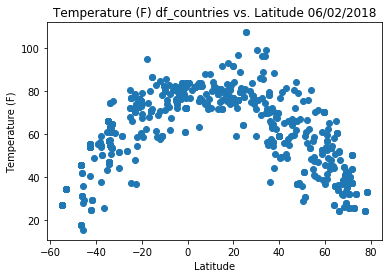

In [12]:
# Scatter Plot for Temperature (F) vs. Latitude

date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(df_countries['Latitude'],df_countries['Temperature (F)'])
plt.title(f"Temperature (F) df_countries vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature (F).png")
plt.show()

HUMIDITY(%) Vs. LATITUDE

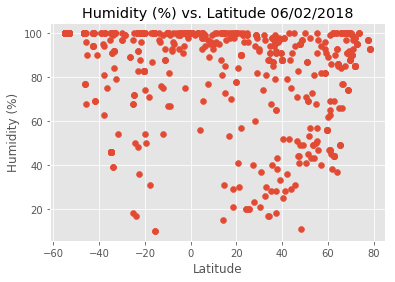

In [13]:
# Scatter Plot for Humidity (%) vs. Latitude

plt.scatter(df_countries['Latitude'], df_countries['Humidity (%)'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity (%).png")
plt.show()

CLOUDINESS(%) Vs. LATITUDE

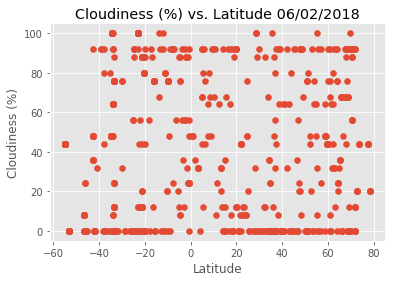

In [14]:
#Scatter Plot for Cloudiness (%) vs. Latitude

plt.scatter(df_countries['Latitude'], df_countries['Cloudiness (%)'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness (%).png")
plt.show()

WIND SPEED(mph) vs. LATITUDE

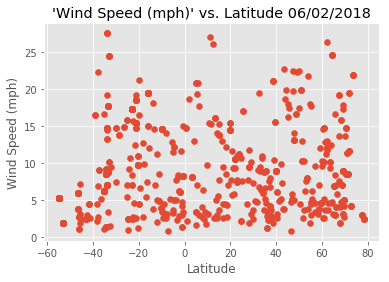

In [15]:
# Scatter Plot for Wind Speed (mph) vs. Latitude

plt.scatter(df_countries['Latitude'], df_countries['Wind Speed (mph)'])
plt.title(f"'Wind Speed (mph)' vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.style.use('ggplot')
plt.savefig('Wind Speed (mph).png')
plt.show()

In [16]:
#Average wind speed
print(df_countries['Wind Speed (mph)'].mean())

9.224910096818812
